In [1]:
%matplotlib inline
import geopandas as gpd
import pandas as pd
import numpy as np
import glob

In [2]:
# df_plus = gpd.read_file('2001_2002_plus.csv', geometry='.geo')
# df_plus.rename({'sum':'lake_growth'}, inplace=True)
# df_minus = gpd.read_file('2001_2002_minus.csv')
# df_minus.rename({'sum':'lake_decline'}, inplace=True)
# df_all = gpd.read_file('2001_2002_all.csv')
# df_all.rename({'sum':'total_pixels'}, inplace=True)


In [3]:
# glob.glob('gsw_reduced/gsw_reduced*/*')
# 'gsw_reduced/gsw_reduced*/*
pluses = glob.glob('gsw_reduced/gsw_reduced*/*_plus.csv')
minuses = glob.glob('gsw_reduced/gsw_reduced*/*_minus.csv')
alles = glob.glob('gsw_reduced/gsw_reduced*/*_all.csv')

In [4]:
sorted(pluses)

['gsw_reduced/gsw_reduced_1/2001_2002_plus.csv',
 'gsw_reduced/gsw_reduced_1/2002_2003_plus.csv',
 'gsw_reduced/gsw_reduced_1/2003_2004_plus.csv',
 'gsw_reduced/gsw_reduced_1/2004_2005_plus.csv',
 'gsw_reduced/gsw_reduced_1/2005_2006_plus.csv',
 'gsw_reduced/gsw_reduced_1/2006_2007_plus.csv',
 'gsw_reduced/gsw_reduced_1/2007_2008_plus.csv',
 'gsw_reduced/gsw_reduced_1/2008_2009_plus.csv',
 'gsw_reduced/gsw_reduced_1/2009_2010_plus.csv',
 'gsw_reduced/gsw_reduced_1/2010_2011_plus.csv',
 'gsw_reduced/gsw_reduced_1/2011_2012_plus.csv',
 'gsw_reduced/gsw_reduced_1/2012_2013_plus.csv',
 'gsw_reduced/gsw_reduced_1/2013_2014_plus.csv',
 'gsw_reduced/gsw_reduced_1/2014_2015_plus.csv',
 'gsw_reduced/gsw_reduced_1/2015_2016_plus.csv',
 'gsw_reduced/gsw_reduced_1/2016_2017_plus.csv',
 'gsw_reduced/gsw_reduced_1/2017_2018_plus.csv',
 'gsw_reduced/gsw_reduced_1/2018_2019_plus.csv',
 'gsw_reduced/gsw_reduced_1/2019_2020_plus.csv',
 'gsw_reduced/gsw_reduced_10/2001_2002_plus.csv',
 'gsw_reduced/gsw_r

In [5]:

df_plus = pd.DataFrame()

def get_data(dataloc):
    df = pd.DataFrame()
    for d in sorted(dataloc):
        print(f'loading {d}')
        df_d = pd.read_csv(d)
        df_d['year'] = int(d.split('/')[2][0:4])
        df_d['region'] = d.split('/')[1].split('_')[2]
        df = pd.concat([df, df_d])
    return df

df_plus = get_data(pluses)
df_minus = get_data(minuses)
df_all = get_data(alles)
# for p in pluses:
#     df_p = pd.read_csv(p)
#     # print(p.split('/'))
#     df_p['year'] = p.split('/')[2][0:4]
#     df_p['region'] = p.split('/')[1].split('_')[2]
#     # print(df_p)
#     df_plus = pd.concat([df_plus, df_p])



# TODO: MERGE EVERYONE WITH EVERYTHING

loading gsw_reduced/gsw_reduced_1/2001_2002_plus.csv
loading gsw_reduced/gsw_reduced_1/2002_2003_plus.csv
loading gsw_reduced/gsw_reduced_1/2003_2004_plus.csv
loading gsw_reduced/gsw_reduced_1/2004_2005_plus.csv
loading gsw_reduced/gsw_reduced_1/2005_2006_plus.csv
loading gsw_reduced/gsw_reduced_1/2006_2007_plus.csv
loading gsw_reduced/gsw_reduced_1/2007_2008_plus.csv
loading gsw_reduced/gsw_reduced_1/2008_2009_plus.csv
loading gsw_reduced/gsw_reduced_1/2009_2010_plus.csv
loading gsw_reduced/gsw_reduced_1/2010_2011_plus.csv
loading gsw_reduced/gsw_reduced_1/2011_2012_plus.csv
loading gsw_reduced/gsw_reduced_1/2012_2013_plus.csv
loading gsw_reduced/gsw_reduced_1/2013_2014_plus.csv
loading gsw_reduced/gsw_reduced_1/2014_2015_plus.csv
loading gsw_reduced/gsw_reduced_1/2015_2016_plus.csv
loading gsw_reduced/gsw_reduced_1/2016_2017_plus.csv
loading gsw_reduced/gsw_reduced_1/2017_2018_plus.csv
loading gsw_reduced/gsw_reduced_1/2018_2019_plus.csv
loading gsw_reduced/gsw_reduced_1/2019_2020_pl

In [6]:
df_plus.groupby('year').count()
df_plus[df_plus.year==2002].HYBAS_ID.unique().shape

(477,)

In [7]:
df = df_plus.merge(df_minus, on=['HYBAS_ID', 'year', 'region'])
df = df.merge(df_all, on=['HYBAS_ID', 'year', 'region'])
df = df[['HYBAS_ID', 'sum_x', 'sum_y', 'sum', 'year', 'region']]
df.columns = ['HYBAS_ID', 'lake_growth', 'lake_decline', 'all', 'year', 'region']                                                                            

In [8]:
# df = pd.DataFrame()

# for p, m, a in zip(pluses, minuses, alles):
#     # print(p, m, a)
#     df_plus = pd.read_csv(p)
#     df_minus = pd.read_csv(m)
#     df_all = pd.read_csv(a)
    
#     df_year = df_plus.merge(df_minus, on = 'HYBAS_ID').merge(df_all, on='HYBAS_ID')[['HYBAS_ID', 'sum_x', 'sum_y', 'sum']]
#     # df_year['year'] = p.split('_')
#     df_year['year'] = p.split('/')[2][0:4]
#     # print(p)
#     # print(p.split('_'))
#     # df_year['region_n'] = p.split('_')[3].split('/')[0]
#     # print(p.split('/')[1].split('_')[2])
#     df_year['region'] = p.split('/')[1].split('_')[2]
#     df = pd.concat([df, df_year])
    
# # df.columns = ['HYBAS_ID', 'lake_growth', 'lake_decline', 'all', 'year']
# df.columns = ['HYBAS_ID', 'lake_growth', 'lake_decline', 'all', 'year', 'region']
# # print(df.columns)
df['growth_ratio'] = df.lake_growth/df['all']
df['decline_ratio'] = df.lake_decline/df['all']*(-1)
df['year'] = df['year'].astype(int)
# df['water_balance'] = (df['lake_growth'] - df['lake_decline'])
df['water_balance'] = (df['lake_growth'] + df['lake_decline'])
# pixels are 30m by 30m square. Therefore we convert to square kilometers below
df['water_balance_m3'] = df['water_balance'] * 30 / 1e3 * 30 / 1e3
df.sort_values('year', inplace=True)
df.drop_duplicates(inplace=True)
df.head()

,HYBAS_ID,lake_growth,lake_decline,all,year,region,growth_ratio,decline_ratio,water_balance,water_balance_m3
0,4060050470,131593.043137,-75959.117647,3.822362e+07,2001,1,0.003443,0.001987,55633.925490,50.070533
7024,4060685650,5658.352941,-3593.000000,3.436465e+07,2001,4,0.000165,0.000105,2065.352941,1.858818
7023,4060623190,3181.278431,-711.000000,6.995463e+06,2001,4,0.000455,0.000102,2470.278431,2.223251
7022,4060607420,1443.686275,-544.811765,2.884887e+06,2001,4,0.000500,0.000189,898.874510,0.808987
7021,4060603790,556.109804,-20.000000,7.101565e+05,2001,4,0.000783,0.000028,536.109804,0.482499


In [9]:
df[df.HYBAS_ID==4060050470]

,HYBAS_ID,lake_growth,lake_decline,all,year,region,growth_ratio,decline_ratio,water_balance,water_balance_m3
0,4060050470,131593.043137,-75959.117647,3.822362e+07,2001,1,0.003443,0.001987,55633.925490,50.070533
2736,4060050470,131593.043137,-75959.117647,3.822362e+07,2001,14,0.003443,0.001987,55633.925490,50.070533
2776,4060050470,132627.027451,-68044.862745,3.822362e+07,2002,14,0.003470,0.001780,64582.164706,58.123948
45,4060050470,132627.027451,-68044.862745,3.822362e+07,2002,1,0.003470,0.001780,64582.164706,58.123948
2816,4060050470,152348.231373,-34683.635294,3.822362e+07,2003,14,0.003986,0.000907,117664.596078,105.898136
90,4060050470,152348.231373,-34683.635294,3.822362e+07,2003,1,0.003986,0.000907,117664.596078,105.898136
2856,4060050470,138768.368627,-36489.000000,3.822362e+07,2004,14,0.003630,0.000955,102279.368627,92.051432
135,4060050470,138768.368627,-36489.000000,3.822362e+07,2004,1,0.003630,0.000955,102279.368627,92.051432
180,4060050470,68123.000000,-83051.090196,3.822362e+07,2005,1,0.001782,0.002173,-14928.090196,-13.435281
2896,4060050470,68123.000000,-83051.090196,3.822362e+07,2005,14,0.001782,0.002173,-14928.090196,-13.435281


In [10]:
df[df.year==2002].HYBAS_ID.unique().shape

(477,)

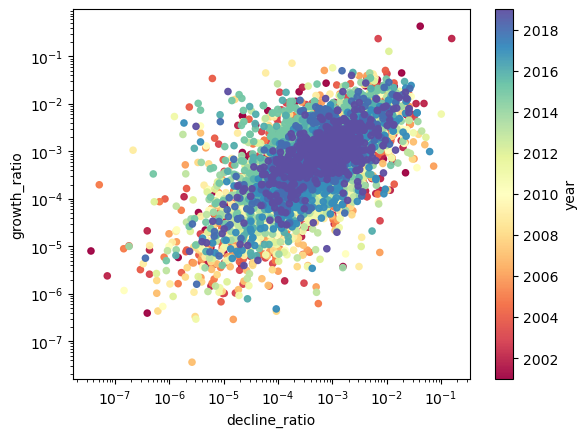

In [11]:
ax = df.plot.scatter('decline_ratio', 'growth_ratio', alpha=0.95, c='year', cmap='Spectral')
ax.set_yscale('log')
ax.set_xscale('log')

<Axes: >

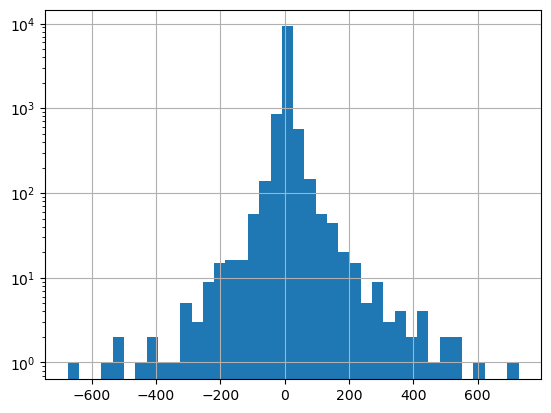

In [12]:
df.water_balance_m3.hist(bins=40, log=True)

In [13]:
df.HYBAS_ID.unique().shape

(477,)

In [14]:
df.year.unique().shape

(19,)

In [15]:
df.groupby(['HYBAS_ID', 'year']).count().reset_index().groupby('year').sum()

,HYBAS_ID,lake_growth,lake_decline,all,region,growth_ratio,decline_ratio,water_balance,water_balance_m3
year,,,,,,,,,
2001,1936824265050,592,592,592,592,592,592,592,592
2002,1936824265050,592,592,592,592,592,592,592,592
2003,1936824265050,592,592,592,592,592,592,592,592
2004,1936824265050,592,592,592,592,592,592,592,592
2005,1936824265050,592,592,592,592,592,592,592,592
2006,1936824265050,592,592,592,592,592,592,592,592
2007,1936824265050,592,592,592,592,592,592,592,592
2008,1936824265050,592,592,592,592,592,592,592,592
2009,1936824265050,592,592,592,592,592,592,592,592


In [16]:
!pwd

/Users/johnaiken/repos/tblakes/data


In [17]:
df.to_csv('lake_data.csv')

In [18]:
# df.columns = ['lg', 'ld', 'lall']
# df['lg'] = df.lg.astype(float)
# df['ld'] = df.ld.astype(float)
# df['lall'] = df.lall.astype(float)

# df['lg/lall'] = df.lg/df.lall
# df['ld/lall'] = df.ld/df.lall

In [19]:
# df.plot.scatter(x='ld/lall', y='lg/lall')

In [20]:
# df.ld/df.lall